In [2]:
import csv
with open('movie_metadata.csv', 'rb') as inp, open('movie.csv', 'wb') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if (row[17] == "USA" or row[17]=="country") and (row[7]!="" and row[19]!=""):
            writer.writerow(row)

In [3]:
import numpy as np
import pandas as pd


filename = 'movie.csv'
movie_df = pd.read_csv(filename)
movie_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178,0,855.0,Joel David Moore,1000.0,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054,English,USA,PG-13,237000000,2009,936.0,7.9,33000
1,Gore Verbinski,302.0,169,563,1000.0,Orlando Bloom,40000.0,309404152,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238,English,USA,PG-13,300000000,2007,5000.0,7.1,0
2,Christopher Nolan,813.0,164,22000,23000.0,Christian Bale,27000.0,448130642,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701,English,USA,PG-13,250000000,2012,23000.0,8.5,164000
3,Andrew Stanton,462.0,132,475,530.0,Samantha Morton,640.0,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738,English,USA,PG-13,263700000,2012,632.0,6.6,24000
4,Sam Raimi,392.0,156,0,4000.0,James Franco,24000.0,336530303,Action|Adventure|Romance,J.K. Simmons,...,sandman|spider man|symbiote|venom|villain,1902,English,USA,PG-13,258000000,2007,11000.0,6.2,0


In [9]:
movie_df[movie_df["imdb_score"]>8.0].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,167.000000,171.000000,154.000000,172.000000,172.000000,1.200000e+02,1.720000e+02,172.000000,170.000000,1.490000e+02,154.000000,172.000000,172.000000,172.000000
mean,233.449102,119.152047,4043.324675,1516.226744,10135.656977,1.424899e+08,4.463375e+05,16115.866279,882.723529,4.248508e+07,1991.350649,2941.197674,8.363953,33150.587209
std,180.083537,43.840489,7289.737238,3954.402795,21521.312426,1.413595e+08,3.817151e+05,26819.074556,845.244532,5.792340e+07,21.835251,5582.030393,0.261088,47788.535814
min,1.000000,22.000000,0.000000,0.000000,0.000000,1.243800e+04,8.000000e+00,0.000000,1.000000,7.000000e+04,1925.000000,0.000000,8.100000,0.000000
25%,110.000000,95.500000,0.000000,190.250000,722.750000,3.022873e+07,1.016490e+05,1987.250000,260.250000,3.200000e+06,1980.000000,397.500000,8.100000,198.500000
50%,185.000000,120.000000,145.000000,457.000000,2500.000000,1.007901e+08,4.101195e+05,5583.500000,699.500000,1.800000e+07,1998.000000,743.500000,8.300000,18000.000000
75%,301.500000,146.500000,964.000000,726.250000,15000.000000,2.066603e+08,6.955530e+05,19976.750000,1119.000000,5.800000e+07,2009.000000,993.250000,8.500000,39000.000000
max,813.000000,289.000000,22000.000000,23000.000000,260000.000000,6.232795e+08,1.689764e+06,261818.000000,4667.000000,2.500000e+08,2016.000000,27000.000000,9.300000,349000.000000


In [10]:
movie_df["gross"].describe()

count    3.235000e+03
mean     5.521461e+07
std      7.173312e+07
min      7.030000e+02
25%      1.011027e+07
50%      3.217878e+07
75%      7.214700e+07
max      7.605058e+08
Name: gross, dtype: float64

In [4]:
movie_df['net'] = movie_df['gross']-movie_df['budget']

In [5]:
movie_df['ror']=movie_df['net']/movie_df['budget']

In [6]:
def made_money(n):
    if n>0:
        return 1
    else:
        return 0

movie_df['profit']=movie_df['net'].apply(made_money)

In [7]:
def category_by_score(n):
    if n>7.5:
        return "Excellent"
    elif (7.5>=n and n>7):
        return "Good"
    elif (7>=n and n>6):
        return "Average"
    elif (6>=n and n>5):
        return "Subpar"
    else: 
        return "Bad"
    
movie_df['quality_by_imdb'] = movie_df['imdb_score'].apply(category_by_score)
        

In [8]:
def era(n):
    if n<1990:
        return "80's and Before"
    elif (n<2000):
        return "90's"
    elif (n<2005):
        return "Early 2000's"
    elif (n<2010):
        return "Late 2000's"
    else:
        return "After 2010"
    
movie_df['era'] = movie_df['title_year'].apply(era)

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


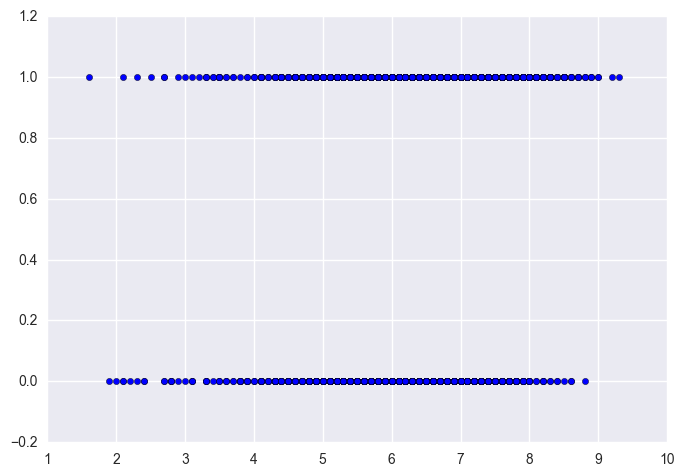

In [14]:
plt.scatter(movie_df['imdb_score'], movie_df['profit'])

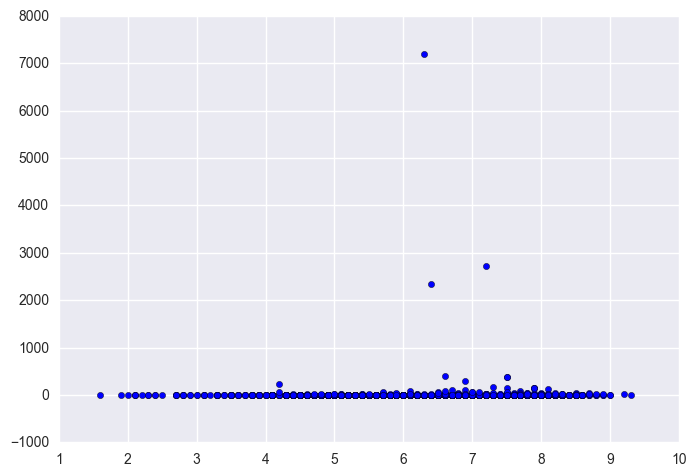

In [8]:
plt.scatter(movie_df['imdb_score'], movie_df['ror'])

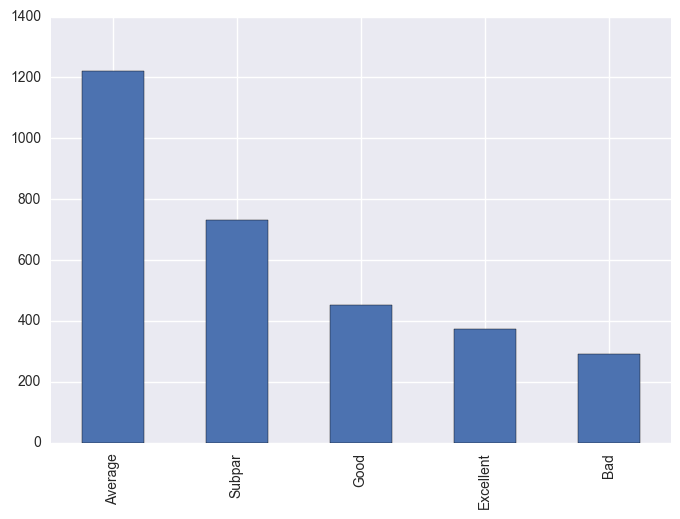

In [35]:
movie_df.quality_by_imdb.value_counts().plot(kind='bar')

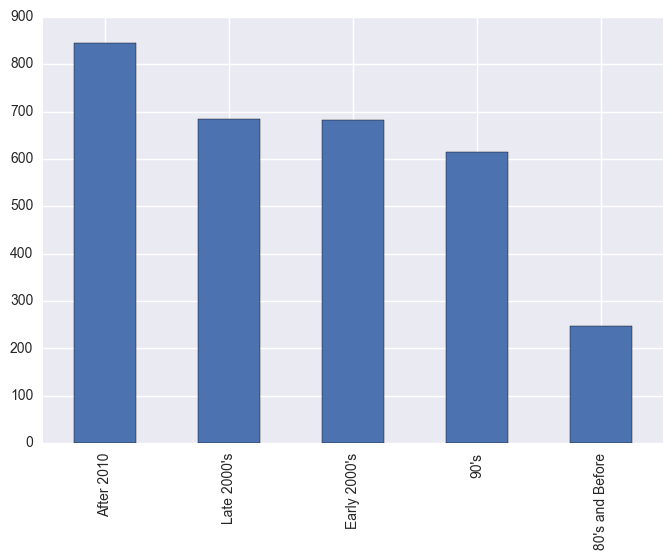

In [45]:
movie_df.era.value_counts().plot(kind='bar')

In [10]:
movie_df.groupby(['era'])['profit'].mean()

era
80's and Before    0.814516
90's               0.595122
After 2010         0.568047
Early 2000's       0.535191
Late 2000's        0.508772
Name: profit, dtype: float64

In [11]:
movie_df.groupby(['quality_by_imdb'])['profit'].mean()

quality_by_imdb
Average      0.548282
Bad          0.447099
Excellent    0.815013
Good         0.713024
Subpar       0.454297
Name: profit, dtype: float64

In [12]:
movie_df.groupby(['era'])['ror'].median()

era
80's and Before    3.171520
90's               0.250000
After 2010         0.168667
Early 2000's       0.127121
Late 2000's        0.015539
Name: ror, dtype: float64

In [13]:
movie_df.groupby(['quality_by_imdb'])['ror'].median()

quality_by_imdb
Average      0.103836
Bad         -0.129862
Excellent    1.249409
Good         0.679272
Subpar      -0.123402
Name: ror, dtype: float64

In [14]:
movie_df.groupby(['era'])['imdb_score'].median()

era
80's and Before    7.05
90's               6.60
After 2010         6.50
Early 2000's       6.30
Late 2000's        6.50
Name: imdb_score, dtype: float64

In [15]:
movie_df.groupby(['era'])['imdb_score'].mean()

era
80's and Before    6.897177
90's               6.498537
After 2010         6.367219
Early 2000's       6.189443
Late 2000's        6.318421
Name: imdb_score, dtype: float64

In [10]:
movie_after_1996=movie_df[movie_df['title_year']>=1996]

In [23]:
movie_after_1996.groupby(['title_year'])['budget'].median()

title_year
1996    32000000
1997    33500000
1998    25500000
1999    24000000
2000    30000000
2001    30000000
2002    25000000
2003    30000000
2004    30000000
2005    30000000
2006    20000000
2007    20000000
2008    30000000
2009    26000000
2010    26000000
2011    35000000
2012    30000000
2013    30000000
2014    26000000
2015    35000000
2016    40000000
Name: budget, dtype: int64

In [12]:
movie_after_1996.groupby(['title_year'])['ror'].median()

title_year
1996    0.009561
1997    0.154271
1998    0.085992
1999   -0.081159
2000    0.161473
2001    0.099950
2002    0.253223
2003    0.208906
2004   -0.069294
2005    0.016306
2006    0.095998
2007   -0.025926
2008   -0.007953
2009    0.077164
2010    0.064747
2011    0.065856
2012    0.070342
2013    0.179224
2014    0.260399
2015    0.254374
2016    0.320996
Name: ror, dtype: float64

In [13]:
movie_after_1996.groupby(['title_year'])['profit'].mean()

title_year
1996    0.518072
1997    0.568182
1998    0.542553
1999    0.492308
2000    0.534351
2001    0.538462
2002    0.564626
2003    0.544715
2004    0.492754
2005    0.519084
2006    0.518248
2007    0.488189
2008    0.489510
2009    0.527397
2010    0.531915
2011    0.525926
2012    0.535714
2013    0.622222
2014    0.648855
2015    0.553571
2016    0.549020
Name: profit, dtype: float64

In [38]:
movie_df[movie_df['title_year']>=1996].count()

director_name                2606
num_critic_for_reviews       2605
duration                     2606
director_facebook_likes      2606
actor_3_facebook_likes       2603
actor_2_name                 2604
actor_1_facebook_likes       2605
gross                        2606
genres                       2606
actor_1_name                 2605
movie_title                  2606
num_voted_users              2606
cast_total_facebook_likes    2606
actor_3_name                 2603
plot_keywords                2587
num_user_for_reviews         2606
language                     2604
country                      2606
content_rating               2587
budget                       2606
title_year                   2606
actor_2_facebook_likes       2604
imdb_score                   2606
movie_facebook_likes         2606
net                          2606
ror                          2606
profit                       2606
quality_by_imdb              2606
era                          2606
dtype: int64

In [39]:
movie_df.groupby(['title_year']).count()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,net,ror,profit,quality_by_imdb,era
title_year,,,,,,,,,,,,,,,,,,,,,
1920,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1929,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1933,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1935,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1936,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1937,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1939,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1940,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1946,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
